Opening raw data file /home/pwjworks/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Not setting metadata
Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
4 projection items activated
Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  e

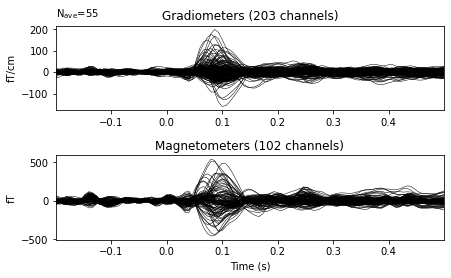

NameError: name 'plt' is not defined

In [1]:
import mne
from mne import io
from mne.datasets import sample
import matplotlib as plt

data_path = sample.data_path()

raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
event_id, tmin, tmax = 1, -0.2, 0.5

# 读取fif文件,创建raw对象
raw = io.read_raw_fif(raw_fname)
# 读取包含event的fif文件，创建event对象
events = mne.read_events(event_fname)

"""
 挑选通道:EEG + MEG - bad channels 
"""
raw.info['bads'] += ['MEG 2443', 'EEG 053']  # bads + 2 more
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True, eog=True,
                       exclude='bads')

# 读取Epoch数据
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=(None, 0), preload=True,
                    reject=dict(grad=4000e-13, mag=4e-12, eog=150e-6))
"""
对epochs数据进行求平均获取诱发响应
"""
evoked = epochs.average()

evoked.plot(time_unit='s')
plt.show()